# Proyek Analisis Data: Air Quality Dataset
- Nama: Rahmat Hidayat
- Email: erererere.njiir@gmail.com
- Id Dicoding: baakanides

## Menentukan Pertanyaan Bisnis

1. Daerah yang memiliki kualitas udara terbaik dan terendah dari rentang waktu tahun 2013 sampai 2017?
2. Bagaimana pengaruh TEMP, WSPM, PRES, & DEWP terhadap kualitas udara?
3. Bagaimana kualitas udara berdasarkan tahun, bulan, hari, & jam ?

### **Mengimport modul yang di perlukan**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Data Wrangling**

### **Gathering Data**

**1. Menyiapkan dataset**

In [60]:
df1 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Aotizhongxin.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Changping.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Dingling.csv")
df4 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Dongsi.csv")
df5 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Guanyuan.csv")
df6 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Gucheng.csv")
df7 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Huairou.csv")
df8 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Nongzhanguan.csv")
df9 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Shunyi.csv")
df10 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Tiantan.csv")
df11 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Wanliu.csv")
df12 = pd.read_csv("https://raw.githubusercontent.com/Rahmatbaaka/submission-AnalisisData_Dicoding/main/data/PRSA_Data_Wanshouxigong.csv")

In [61]:
#menggabungkan semua data set menjadi satu
df_AQI = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], axis=0)
df_AQI = df_AQI.reset_index() #memberikan index/no baru
df_AQI

,index,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35059,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35060,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


**2. Menghapus kolom yang tidak diperlukan**

In [62]:
df_AQI = df_AQI.drop('No', axis=1 )
df_AQI.head() #menampilkan 5 baris pertama

,index,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**3. Menambahkan kolom baru datetime (gabungan dari kolom year,month, day)**

In [63]:
from datetime import datetime

df_AQI['datetime'] = df_AQI.apply(lambda row: datetime(row['year'], row['month'], row['day']), axis=1) #menggabungkan 3 kolom menjadi kolom datetime

#mendindahkan kolom datetime ke paling kiri
df_datetime = df_AQI['datetime']
df_AQI.drop('datetime', axis=1, inplace=True)
df_AQI.insert(0, 'datetime', df_datetime)

df_AQI.head() #menampilkan 5 baris pertama

,datetime,index,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01,0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**4. mengganti isi data kolom [hour, day, dan month], menyesuaikan type data dan mengubah nama kolom**

In [64]:
#Mengganti isi data kolom month

df_AQI['month']= df_AQI['month'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [65]:
#Mengganti isi data kolom hour

def number_to_hour(hour_number):
  return f'{hour_number:02}:00'

list_jam = [number_to_hour(hour_number) for hour_number in df_AQI['hour']]

df_AQI['hour'] = list_jam

In [66]:
#Mengganti isi data kolom day

import calendar

def number_to_day(number):
  day_number = (number  - 1) % 7
  return calendar.day_name[day_number]

df_AQI['day'] = df_AQI['day'].apply(number_to_day)

In [67]:
#Menambah nama setiap kolom dengan "kolom_"

df_AQI = df_AQI.add_prefix('kolom_')

In [68]:
kolom = ["kolom_year", "kolom_month", "kolom_day", "kolom_hour"]
df_AQI[kolom]= df_AQI[kolom].astype("category")

### **Assesing Data**

**1. Memeriksa type data df_AQI**

In [69]:
print('type data df_Nongzhanguan\n')
df_AQI.info()

type data df_Nongzhanguan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   kolom_datetime  420768 non-null  datetime64[ns]
 1   kolom_index     420768 non-null  int64         
 2   kolom_year      420768 non-null  category      
 3   kolom_month     420768 non-null  category      
 4   kolom_day       420768 non-null  category      
 5   kolom_hour      420768 non-null  category      
 6   kolom_PM2.5     412029 non-null  float64       
 7   kolom_PM10      414319 non-null  float64       
 8   kolom_SO2       411747 non-null  float64       
 9   kolom_NO2       408652 non-null  float64       
 10  kolom_CO        400067 non-null  float64       
 11  kolom_O3        407491 non-null  float64       
 12  kolom_TEMP      420370 non-null  float64       
 13  kolom_PRES      420375 non-null  float64       
 14  kolom_DEW

**2. Memeriksa missing value**

In [70]:
print('='*46)
print('| Jumblah data missing value df_Nongzhanguan |')
print('='*46)
df_AQI.isna().sum()

| Jumblah data missing value df_Nongzhanguan |


kolom_datetime        0
kolom_index           0
kolom_year            0
kolom_month           0
kolom_day             0
kolom_hour            0
kolom_PM2.5        8739
kolom_PM10         6449
kolom_SO2          9021
kolom_NO2         12116
kolom_CO          20701
kolom_O3          13277
kolom_TEMP          398
kolom_PRES          393
kolom_DEWP          403
kolom_RAIN          390
kolom_wd           1822
kolom_WSPM          318
kolom_station         0
dtype: int64

**3. Memeriksan data duplicated df_Nongzhanguan**

In [71]:
print(f'Jumblah data duplicated df_Nongzhanguan: {df_AQI.duplicated().sum()}')

Jumblah data duplicated df_Nongzhanguan: 0


**4. Memeriksa parameter statistik df_Nongzhanguan**

In [72]:
df_AQI.describe()

,kolom_index,kolom_PM2.5,kolom_PM10,kolom_SO2,kolom_NO2,kolom_CO,kolom_O3,kolom_TEMP,kolom_PRES,kolom_DEWP,kolom_RAIN,kolom_WSPM
count,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17531.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8765.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17531.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26297.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35063.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


sampai tahap ini kita berhasil mengidentifikasi berbagai masalah pada data yang telah kita kumpulkan

jumblah data duplikasi : 0

data missing value : terdapat di kolom **[kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3, kolom_TEMP, kolom_PRES, kolom_DEWP, kolom_RAIN, kolom_wd, kolom_WSPM]**

### **Cleaning Data**

**Menangani missing value**

In [73]:
df_AQI.isna().sum()

kolom_datetime        0
kolom_index           0
kolom_year            0
kolom_month           0
kolom_day             0
kolom_hour            0
kolom_PM2.5        8739
kolom_PM10         6449
kolom_SO2          9021
kolom_NO2         12116
kolom_CO          20701
kolom_O3          13277
kolom_TEMP          398
kolom_PRES          393
kolom_DEWP          403
kolom_RAIN          390
kolom_wd           1822
kolom_WSPM          318
kolom_station         0
dtype: int64

**Dari output code diatas, missing value setiap column berbeda-beda. Maka cara penangananya juga berbeda. Untuk missing value di bawah 5000 akan kita hapus, missing value antara 5000-10000 akan kita ganti nilainya dengan nilai mean/mode, dan untuk missing value di atas 10000 akan kita ganti dengan median agar tidak terganggu dengan outliernya**



*   Missing value di bawah 5000




In [74]:
df_AQI.dropna(subset=["kolom_WSPM", "kolom_wd", "kolom_RAIN", "kolom_DEWP", "kolom_PRES", "kolom_TEMP"], axis=0, inplace=True) #Mengahapus kolom yang yang memiliki nilai kosong



*  Missing value antara 5000-10000



In [75]:
#Mengganti nilai kolom yang kosong dengan nilai mean
name_kolom = ["kolom_PM2.5", "kolom_PM10", "kolom_SO2","kolom_NO2", "kolom_O3"]

for kolom in name_kolom:
  mean_kolom = df_AQI[kolom].mean()
  df_AQI[kolom].fillna(mean_kolom, axis=0, inplace=True)



*   Missing value di atas 10000



In [76]:
#Mengganti nilai kolom yang kosong dengan nilai median
median_value = df_AQI["kolom_CO"].median()
df_AQI["kolom_CO"].fillna(median_value, axis=0, inplace=True)

Memeriksa Missing value

In [77]:
df_AQI.isna().sum()

kolom_datetime    0
kolom_index       0
kolom_year        0
kolom_month       0
kolom_day         0
kolom_hour        0
kolom_PM2.5       0
kolom_PM10        0
kolom_SO2         0
kolom_NO2         0
kolom_CO          0
kolom_O3          0
kolom_TEMP        0
kolom_PRES        0
kolom_DEWP        0
kolom_RAIN        0
kolom_wd          0
kolom_WSPM        0
kolom_station     0
dtype: int64

Dapat dilihat dari output di atas bahwa data kita sudah bersih dari Missing value

Data sudah bersih dari duplicated dan missing value, data dapat digunakan ke tahap selanjutnya, yakni EDA

## **Exploratory Data Analysis (EDA)**

In [78]:
#Menampilkan parameter statistik data dari semua kolom
df_AQI.describe(include='all')

<ipython-input-78-750fb0188333>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_AQI.describe(include='all')


,kolom_datetime,kolom_index,kolom_year,kolom_month,kolom_day,kolom_hour,kolom_PM2.5,kolom_PM10,kolom_SO2,kolom_NO2,kolom_CO,kolom_O3,kolom_TEMP,kolom_PRES,kolom_DEWP,kolom_RAIN,kolom_wd,kolom_WSPM,kolom_station
count,418858,418858.000000,418858.0,418858,418858,418858,418858.000000,418858.000000,418858.00000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858.000000,418858,418858.000000,418858
unique,1461,NaN,5.0,12,7,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,2013-03-01 00:00:00,NaN,2014.0,Mar,Monday,16:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dongsi
freq,288,NaN,105105.0,35692,67975,17519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43322,NaN,34980
first,2013-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,17484.092955,NaN,NaN,NaN,NaN,79.707228,104.540046,15.84451,50.594782,1212.680302,57.507136,13.562796,1010.732098,2.493081,0.064609,NaN,1.734993,NaN
std,NaN,10110.297282,NaN,NaN,NaN,NaN,79.947503,91.052988,21.43823,34.604779,1132.119948,55.804379,11.434838,10.475351,13.800842,0.822399,NaN,1.244678,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.28560,1.026500,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,NaN,0.000000,NaN
25%,NaN,8729.000000,NaN,NaN,NaN,NaN,21.000000,36.000000,3.00000,24.000000,500.000000,12.000000,3.200000,1002.200000,-8.900000,0.000000,NaN,0.900000,NaN


karena pada data kita tidak menampilkan kelompok/clustering kualitas udara. Maka dari itu, kita akan menuliskan sebuah code untuk mengclustering kualitas udara berdasarkan beberapa faktor-faktor  **(PM25, PM10, SO2, NO2, CO, O3)** yang ada di data kita

In [79]:
#batasan/standard setiap faktor untuk menentukan kualitas udara
def tentukan_kualitas_udara(PM25, PM10, SO2, NO2, CO, O3):
    standar = {
        'PM25': [(0, 12), (12, 35), (35, float('inf'))],
        'PM10': [(0, 50), (50, 100), (100, float('inf'))],
        'SO2': [(0, 20), (20, 100), (100, float('inf'))],
        'NO2': [(0, 40), (40, 100), (100, float('inf'))],
        'CO': [(0, 1000), (1000, 5000), (5000, float('inf'))],
        'O3': [(0, 100), (100, 180), (180, float('inf'))]
    }

    # Fungsi untuk menentukan kualitas udara
    def tentukan_kualitas(nilai, parameter):
        for kualitas, batas in enumerate(standar[parameter], start=1):
            if isinstance(batas, tuple):
                if batas[0] <= nilai < batas[1]:
                    return kualitas
            else:
                if nilai == batas:
                    return kualitas
        return 3  # Jika tidak ada yang cocok, maka kualitas dianggap "Buruk"

    # Menentukan kualitas untuk setiap parameter dengan mengonversi ke float
    kualitas_PM25 = tentukan_kualitas(float(PM25), 'PM25')
    kualitas_PM10 = tentukan_kualitas(float(PM10), 'PM10')
    kualitas_SO2 = tentukan_kualitas(float(SO2), 'SO2')
    kualitas_NO2 = tentukan_kualitas(float(NO2), 'NO2')
    kualitas_CO = tentukan_kualitas(float(CO), 'CO')
    kualitas_O3 = tentukan_kualitas(float(O3), 'O3')

    # Menghitung rata-rata dari nilai-nilai kualitas
    rata_rata_kualitas = (kualitas_PM25 + kualitas_PM10 + kualitas_SO2 + kualitas_NO2 + kualitas_CO + kualitas_O3) / 6

    if rata_rata_kualitas < 2:  # Misalnya, jika rata-rata kurang dari 2, dianggap "Baik"
        return 'Baik'
    elif rata_rata_kualitas < 2.5:  # Jika rata-rata antara 2 dan 2.5, dianggap "Sedang"
        return 'Sedang'
    else:
        return 'Buruk'


df_AQI['kualitas_udara'] = df_AQI.apply(
    lambda row: tentukan_kualitas_udara(
        row['kolom_PM2.5'],
        row['kolom_PM10'],
        row['kolom_SO2'],
        row['kolom_NO2'],
        row['kolom_CO'],
        row['kolom_O3']
    ),
    axis=1
)
df_AQI['kualitas_udara'] = df_AQI.kualitas_udara.astype('category') #untuk mengganti tipe data menjadi category

kita cek apakah code di atas berjalan dengan baik apa tidak, dengan menjalankan code di bawah untuk menampilkan 20 data sample

In [80]:
df_AQI.sample(20)

,kolom_datetime,kolom_index,kolom_year,kolom_month,kolom_day,kolom_hour,kolom_PM2.5,kolom_PM10,kolom_SO2,kolom_NO2,kolom_CO,kolom_O3,kolom_TEMP,kolom_PRES,kolom_DEWP,kolom_RAIN,kolom_wd,kolom_WSPM,kolom_station,kualitas_udara
367272,2015-01-23,16632,2015,Jan,Tuesday,00:00,221.0,283.0,80.0000,143.0000,4500.0,2.000000,-2.0,1013.0,-12.7,0.0,ENE,1.2,Wanliu,Sedang
199187,2015-11-20,23867,2015,Nov,Saturday,11:00,63.0,63.0,2.0000,43.0000,1900.0,2.000000,1.9,1020.1,0.4,0.0,SSE,0.6,Gucheng,Baik
180577,2013-10-06,5257,2013,Oct,Saturday,01:00,354.0,361.0,2.0000,110.0000,2500.0,2.000000,13.9,1015.6,13.1,0.0,N,0.0,Gucheng,Sedang
145898,2013-10-22,5642,2013,Oct,Monday,02:00,136.0,163.0,16.2792,101.2129,900.0,57.507136,6.9,1017.9,6.2,0.0,NNE,0.7,Guanyuan,Sedang
99683,2016-07-14,29555,2016,Jul,Sunday,11:00,41.0,57.0,5.0000,34.0000,800.0,103.000000,29.8,998.5,19.8,0.0,SSW,1.1,Dingling,Baik
35709,2013-03-27,645,2013,Mar,Saturday,21:00,6.0,11.0,3.0000,9.0000,400.0,88.000000,9.1,1008.9,-17.1,0.0,NNE,3.5,Changping,Baik
415986,2016-08-13,30282,2016,Aug,Saturday,18:00,18.0,55.0,3.0000,45.0000,400.0,39.000000,30.2,1001.0,17.3,0.0,WNW,2.4,Wanshouxigong,Baik
307101,2016-03-12,26589,2016,Mar,Friday,21:00,133.0,150.0,48.0000,117.0000,1800.0,3.000000,3.8,1015.5,-7.1,0.0,N,0.9,Shunyi,Sedang
388453,2013-06-23,2749,2013,Jun,Tuesday,13:00,29.0,7.0,12.0000,14.0000,800.0,166.000000,30.0,995.8,16.4,0.0,WSW,2.9,Wanshouxigong,Baik
23712,2015-11-14,23712,2015,Nov,Sunday,00:00,258.0,258.0,12.0000,91.0000,4900.0,5.000000,6.5,1014.2,5.3,0.0,ENE,1.0,Aotizhongxin,Sedang


output sudah sesuai dengan apa yang kita inginkan di kolom kualitas_udara, mari kita lihat jumblah data di kolom kualitas_udara

In [81]:
df_AQI.kualitas_udara.value_counts()

Baik      263145
Sedang    147974
Buruk       7739
Name: kualitas_udara, dtype: int64

Dari output di atas dapat di ketahui bahwa nilai dominan dari kolom kualitas_udara adalah Baik

mari kita buat kolom yang berisi nilai dari kualitas udara, jika buruk=-1, sedang=0, dan baik=1. kolom ini bertujuan untuk memdudahkan kita dalam visualisasi data

In [82]:
df_AQI["index_AQI"] = df_AQI["kualitas_udara"]
df_AQI["index_AQI"] = df_AQI["index_AQI"].map({"Baik": 1, "Sedang": 0, "Buruk": -1})
df_AQI["index_AQI"] = df_AQI["index_AQI"].astype("int")

In [83]:
df_AQI.info() #Menampilkan jumblah data dan type data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418858 entries, 0 to 420767
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   kolom_datetime  418858 non-null  datetime64[ns]
 1   kolom_index     418858 non-null  int64         
 2   kolom_year      418858 non-null  category      
 3   kolom_month     418858 non-null  category      
 4   kolom_day       418858 non-null  category      
 5   kolom_hour      418858 non-null  category      
 6   kolom_PM2.5     418858 non-null  float64       
 7   kolom_PM10      418858 non-null  float64       
 8   kolom_SO2       418858 non-null  float64       
 9   kolom_NO2       418858 non-null  float64       
 10  kolom_CO        418858 non-null  float64       
 11  kolom_O3        418858 non-null  float64       
 12  kolom_TEMP      418858 non-null  float64       
 13  kolom_PRES      418858 non-null  float64       
 14  kolom_DEWP      418858 non-null  flo

### **1. Cek data parameter**

**1.1 cek data pameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan kualitas udara**

In [84]:
df_AQI.groupby(by= "kualitas_udara").agg({
    "kolom_PM2.5": ["max", "min", "mean"],
    "kolom_PM10" : ['max', 'min', 'mean'],
    "kolom_SO2" : ['max', 'min', 'mean'],
    "kolom_NO2" : ['max', 'min', 'mean'],
    "kolom_CO" : ['max', 'min', 'mean'],
    "kolom_O3" : ['max', 'min', 'mean'],
})

kolom_PM2.5                   kolom_PM10                    \
                       max   min        mean        max   min        mean   
kualitas_udara                                                              
Baik                 580.0   2.0   38.803316      999.0   2.0   58.783212   
Buruk                809.0  42.0  272.905984      999.0  61.0  311.903373   
Sedang               999.0   3.0  142.343196      994.0   4.0  175.065256   

               kolom_SO2                    kolom_NO2                       \
                     max     min       mean       max      min        mean   
kualitas_udara                                                               
Baik               500.0  0.2856   7.302790     231.0   1.0265   34.229837   
Buruk              315.0  4.0000  79.109075     273.0  40.0000  121.619599   
Sedang             500.0  0.2856  27.725695     290.0   2.0000   75.982298   

               kolom_CO                     kolom_O3                     
                    max    min         mean      max     min       mean  
kualitas_udara                                                           
Baik            10000.0  100.0   681.662034   1050.0  0.2142  60.845998  
Buruk           10000.0  400.0  4580.754490   1071.0  0.2142  55.420245  
Sedang          10000.0  100.0  1980.850899   1071.0  0.2142  51.678719

Keterangan:

Berdasarkan hasil tersebut di dapatkan informasi bahwa, baris baik pada kolom kualitas_udara memiliki nilai mean yang relatif lebih rendah jika di bandingkan baris lain. Jika di kelompokkan berdasarkan nilai mean dari yang terkecil
1. baik
2. sedang
3. buruk





**1.2 cek data pameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan tempat stasiun**

In [85]:
df_AQI.groupby(by= "kolom_station").agg({
    "kolom_PM2.5": ["max", "min", "mean"],
    "kolom_PM10" : ['max', 'min', 'mean'],
    "kolom_SO2" : ['max', 'min', 'mean'],
    "kolom_NO2" : ['max', 'min', 'mean'],
    "kolom_CO" : ['max', 'min', 'mean'],
    "kolom_O3" : ['max', 'min', 'mean'],
})

kolom_PM2.5                 kolom_PM10                   \
                      max  min       mean        max  min        mean   
kolom_station                                                           
Aotizhongxin        898.0  3.0  82.675086      984.0  2.0  109.946421   
Changping           882.0  2.0  71.179889      999.0  2.0   94.720732   
Dingling            881.0  3.0  66.188317      905.0  2.0   84.055196   
Dongsi              737.0  3.0  86.017997      955.0  2.0  110.196997   
Guanyuan            680.0  2.0  82.854068      999.0  2.0  108.935650   
Gucheng             770.0  2.0  83.686124      994.0  2.0  118.646175   
Huairou             762.0  2.0  69.762001      993.0  2.0   91.722954   
Nongzhanguan        844.0  2.0  84.720816      995.0  2.0  108.911015   
Shunyi              941.0  2.0  78.980924      999.0  2.0   98.302053   
Tiantan             821.0  3.0  82.103133      988.0  2.0  106.333994   
Wanliu              957.0  2.0  83.330616      951.0  2.0  110.424038   
Wanshouxigong       999.0  3.0  84.887476      961.0  2.0  112.113412   

              kolom_SO2                    kolom_NO2                     \
                    max     min       mean       max     min       mean   
kolom_station                                                             
Aotizhongxin      341.0  0.2856  17.345220     290.0  2.0000  59.010902   
Changping         310.0  0.2856  14.982183     226.0  1.8477  44.267785   
Dingling          156.0  0.2856  11.830243     205.0  1.0265  28.366600   
Dongsi            300.0  0.2856  18.487665     258.0  2.0000  53.508997   
Guanyuan          293.0  1.0000  17.566285     270.0  2.0000  57.725304   
Gucheng           500.0  0.2856  15.372565     276.0  2.0000  55.723211   
Huairou           315.0  0.2856  12.268448     231.0  1.0265  33.349722   
Nongzhanguan      257.0  0.5712  18.659744     273.0  2.0000  57.923299   
Shunyi            239.0  0.2856  13.636948     258.0  2.0000  43.773834   
Tiantan           273.0  0.5712  14.430910     241.0  2.0000  53.096813   
Wanliu            282.0  0.2856  18.364478     264.0  1.6424  64.786588   
Wanshouxigong     411.0  0.2856  17.133690     251.0  2.0000  55.390408   

              kolom_CO                       kolom_O3                     
                   max    min         mean        max     min       mean  
kolom_station                                                             
Aotizhongxin   10000.0  100.0  1243.760700   423.0000  0.2142  56.459472  
Changping      10000.0  100.0  1138.952367   429.0000  0.2142  58.055606  
Dingling       10000.0  100.0   902.512674   500.0000  0.2142  68.282120  
Dongsi         10000.0  100.0  1289.980360  1071.0000  0.6426  57.295073  
Guanyuan       10000.0  100.0  1252.153901   415.0000  0.2142  55.895995  
Gucheng        10000.0  100.0  1305.603502   450.0000  0.2142  57.816993  
Huairou        10000.0  100.0  1015.422110   444.0000  0.2142  60.018291  
Nongzhanguan   10000.0  100.0  1308.966524   390.0000  0.2142  58.591829  
Shunyi         10000.0  100.0  1159.490021   351.7164  0.2142  55.748211  
Tiantan        10000.0  100.0  1284.823270   674.0000  0.4284  56.095801  
Wanliu         10000.0  100.0  1295.930814   364.0000  0.2142  49.493694  
Wanshouxigong   9800.0  100.0  1352.272192   358.0000  0.2142  56.340105

keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa


*   Daerah Dingling, Huairou, dan Changping memeiliki nilai mean terendah
*   Daerah Nongzhanguan, Gucheng, dan Wanliu memiliki nilai mean tertinggi



**1.3 cek data pameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan tahun**

In [86]:
df_AQI.groupby(by= "kolom_year").agg({
    "kolom_PM2.5": ["max", "min", "mean", "count"],
    "kolom_PM10" : ['max', 'min', 'mean'],
    "kolom_SO2" : ['max', 'min', 'mean'],
    "kolom_NO2" : ['max', 'min', 'mean'],
    "kolom_CO" : ['max', 'min', 'mean'],
    "kolom_O3" : ['max', 'min', 'mean'],
})

kolom_PM2.5                         kolom_PM10                   \
                   max  min       mean   count        max  min        mean   
kolom_year                                                                   
2013             844.0  2.0  80.010274   88094      999.0  2.0  102.823659   
2014             809.0  3.0  85.419711  105105      999.0  3.0  115.870830   
2015             762.0  3.0  79.540518  104523      999.0  3.0  103.556222   
2016             999.0  3.0  71.916931  104631      995.0  3.0   94.605875   
2017             835.0  2.0  92.153426   16505      994.0  3.0  110.752470   

           kolom_SO2                    kolom_NO2                    kolom_CO  \
                 max     min       mean       max     min       mean      max   
kolom_year                                                                      
2013           234.0  0.2856  19.973224     273.0  1.0265  52.480708  10000.0   
2014           500.0  1.0000  20.704752     285.0  2.0000  54.576215  10000.0   
2015           314.0  2.0000  13.068938     290.0  2.0000  48.211039  10000.0   
2016           500.0  2.0000   9.924926     253.0  2.0000  46.388064  10000.0   
2017           300.0  1.0000  17.960995     276.0  2.0000  56.938423  10000.0   

                               kolom_O3                     
              min         mean      max     min       mean  
kolom_year                                                  
2013        100.0  1158.579994   1071.0  0.2142  57.348644  
2014        100.0  1245.365111    413.0  1.0000  58.274299  
2015        100.0  1250.818480    450.0  2.0000  59.369281  
2016        100.0  1130.672554    500.0  1.0000  57.696044  
2017        100.0  1571.651015    500.0  1.0000  40.477576

Keterangan:


*   PM2.5 (Partikel Matter 2.5 Mikrometer): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2017
*   PM10 (Partikel Matter 10 Mikrometer): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2014

*   SO2 (Dioksida Belerang): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2014

*   NO2 (Dioksida Nitrogen): rata-rata paling sediki pada tahun 2016 dan paling banyak 2014

*   CO (Karbon Monoksida): rata-rata paling sedikit pada tahun 2016 dan paling banyak 2017

* O3 (Ozon): rata-rata paling sedikit pada tahun 2017 dan paling banyak 2015







**1.4 cek data pameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan bulan**

In [87]:
df_AQI.groupby(by= "kolom_month").agg({
    "kolom_PM2.5": ["max", "min", "mean", "count"],
    "kolom_PM10" : ['max', 'min', 'mean'],
    "kolom_SO2" : ['max', 'min', 'mean'],
    "kolom_NO2" : ['max', 'min', 'mean'],
    "kolom_CO" : ['max', 'min', 'mean'],
    "kolom_O3" : ['max', 'min', 'mean'],
})

kolom_PM2.5                         kolom_PM10                   \
                    max  min        mean  count        max  min        mean   
kolom_month                                                                   
Apr               533.0  2.0   72.889229  34510      999.0  2.0  116.719498   
Aug               500.0  3.0   53.854657  35642      748.0  2.0   71.834993   
Dec               741.0  3.0  103.656280  35580      948.0  2.0  124.731482   
Feb               999.0  3.0   87.302109  32274      992.0  3.0  102.547699   
Jan               835.0  2.0   93.440503  35244      999.0  3.0  113.125964   
Jul               540.0  3.0   71.989508  35647      862.0  2.0   84.987446   
Jun               560.0  2.0   69.346075  34531      647.0  2.0   86.989335   
Mar               558.0  3.0   94.473345  35692      987.0  2.0  135.699181   
May               844.0  3.0   63.583799  35665      995.0  2.0  107.021183   
Nov               687.0  3.0   92.996062  34358      993.0  3.0  117.804457   
Oct               527.0  3.0   91.386328  35468      999.0  2.0  112.339021   
Sep               477.0  3.0   61.766353  34247      584.0  2.0   79.974660   

            kolom_SO2                    kolom_NO2                     \
                  max     min       mean       max     min       mean   
kolom_month                                                             
Apr             158.0  0.2856  14.266580     231.0  1.6424  47.394787   
Aug             218.0  0.2856   4.863961     188.0  2.0000  36.393633   
Dec             219.0  1.0000  25.497412     265.0  1.6424  66.078639   
Feb             500.0  1.0000  27.990301     264.0  2.0000  50.220793   
Jan             500.0  1.0000  31.430561     276.0  2.0000  61.480173   
Jul             240.0  0.2856   5.821134     177.0  1.0265  36.193508   
Jun             227.0  0.2856   8.101264     228.0  2.0000  39.602553   
Mar             310.0  1.4280  27.846565     273.0  2.0000  59.937678   
May             500.0  2.0000  14.159332     242.0  2.0000  42.850657   
Nov             234.0  0.5712  15.366448     232.0  1.0265  61.688627   
Oct             273.0  0.2856   8.860974     290.0  1.2318  59.484168   
Sep             147.0  1.0000   6.547113     206.0  2.0000  45.727506   

            kolom_CO                       kolom_O3                     
                 max    min         mean        max     min       mean  
kolom_month                                                             
Apr           5800.0  100.0   842.060591   674.0000  0.2142  69.961069  
Aug           6700.0  100.0   828.539364  1071.0000  0.2142  87.550215  
Dec          10000.0  100.0  2033.299607   500.0000  0.2142  22.995457  
Feb           9800.0  100.0  1367.853380   216.0000  1.0000  41.375686  
Jan          10000.0  100.0  1836.221768   500.0000  1.0000  28.358267  
Jul           4200.0  100.0   892.506915   500.0000  0.2142  93.969396  
Jun          10000.0  100.0   982.625062   432.0000  0.2142  93.667641  
Mar          10000.0  100.0  1298.317382   450.0000  0.2142  51.188024  
May           6100.0  100.0   801.262751   500.0000  0.2142  91.065441  
Nov           9900.0  100.0  1621.831888   444.0000  0.2142  21.735169  
Oct           9100.0  100.0  1131.400135   295.3818  0.2142  31.022956  
Sep           5700.0  100.0   923.573890   283.0000  0.6426  55.286346

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa


*   Bulan Agustus, Juli, & Juni memeiliki nilai mean terendah
*   Bulan januari, Desember, & Maret memiliki nilai mean tertinggi

**1.5 cek data pameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan hari**

In [88]:
df_AQI.groupby(by= "kolom_day").agg({
    "kolom_PM2.5": ["max", "min", "mean", "count"],
    "kolom_PM10" : ['max', 'min', 'mean'],
    "kolom_SO2" : ['max', 'min', 'mean'],
    "kolom_NO2" : ['max', 'min', 'mean'],
    "kolom_CO" : ['max', 'min', 'mean'],
    "kolom_O3" : ['max', 'min', 'mean']
})

kolom_PM2.5                        kolom_PM10                   \
                  max  min       mean  count        max  min        mean   
kolom_day                                                                  
Friday          844.0  3.0  75.608879  55077      991.0  2.0  100.043696   
Monday          999.0  3.0  83.874959  67975      999.0  2.0  111.123577   
Saturday        646.0  2.0  75.518608  55039      995.0  2.0   97.836651   
Sunday          835.0  2.0  82.905926  55022      994.0  2.0  106.499951   
Thursday        705.0  2.0  80.715441  54950      857.0  2.0  103.564897   
Tuesday         687.0  2.0  79.394372  67706      999.0  2.0  104.805842   
Wednesday       640.0  2.0  79.116679  63089      948.0  2.0  106.074842   

          kolom_SO2                    kolom_NO2                    kolom_CO  \
                max     min       mean       max     min       mean      max   
kolom_day                                                                      
Friday        314.0  0.2856  14.440273     259.0  1.0265  48.637313  10000.0   
Monday        500.0  0.2856  16.944435     243.0  1.2318  51.900701  10000.0   
Saturday      310.0  0.2856  14.966539     238.0  1.6424  49.374170  10000.0   
Sunday        500.0  0.2856  16.117869     273.0  1.6424  51.227210  10000.0   
Thursday      293.0  0.2856  15.190191     285.0  1.4371  50.946250  10000.0   
Tuesday       263.0  0.2856  16.493905     290.0  2.0000  50.751244  10000.0   
Wednesday     315.0  0.2856  16.285832     264.0  1.0265  50.935870  10000.0   

                              kolom_O3                     
             min         mean      max     min       mean  
kolom_day                                                  
Friday     100.0  1153.558908    423.0  0.2142  58.784069  
Monday     100.0  1250.158779   1071.0  0.2142  56.004115  
Saturday   100.0  1175.960410    500.0  0.2142  58.410607  
Sunday     100.0  1240.094344    409.0  0.2142  57.591532  
Thursday   100.0  1241.660619    403.0  0.2142  57.146245  
Tuesday    100.0  1201.599563   1071.0  0.2142  58.044973  
Wednesday  100.0  1218.688393   1071.0  0.2142  56.887135

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* Hari Selasa, Senin & Rabu memeiliki nilai mean terendah
* hari Minggu, Kamis & Sabtu memiliki nilai mean tertinggi

**1.6 cek data pameter statistik kolom_PM2.5, kolom_PM10, kolom_SO2, kolom_NO2, kolom_CO, kolom_O3 berdasarkan jam**

In [89]:
df_AQI.groupby(by= "kolom_hour").agg({
    "kolom_PM2.5": ["max", "min", "mean", "count"],
    "kolom_PM10" : ['max', 'min', 'mean'],
    "kolom_SO2" : ['max', 'min', 'mean'],
    "kolom_NO2" : ['max', 'min', 'mean'],
    "kolom_CO" : ['max', 'min', 'mean'],
    "kolom_O3" : ['max', 'min', 'mean']
})

kolom_PM2.5                        kolom_PM10                   \
                   max  min       mean  count        max  min        mean   
kolom_hour                                                                  
00:00            809.0  3.0  87.392862  17436      986.0  2.0  114.691758   
01:00            881.0  3.0  86.462239  17412      991.0  2.0  111.045779   
02:00            999.0  3.0  84.398700  17436      995.0  2.0  106.521868   
03:00            857.0  3.0  81.845857  17416      992.0  2.0  102.117386   
04:00            801.0  2.0  79.285087  17371      973.0  2.0   97.798374   
05:00            770.0  2.0  76.364755  17415      893.0  2.0   93.788172   
06:00            720.0  3.0  74.324116  17419      839.0  2.0   92.328267   
07:00            712.0  3.0  73.381870  17432      828.0  2.0   93.888028   
08:00            610.0  3.0  74.590217  17469      785.0  2.0   98.575608   
09:00            640.0  3.0  76.084853  17504      895.0  2.0  100.886673   
10:00            661.0  2.0  77.204315  17493      947.0  2.0  100.963425   
11:00            705.0  2.0  77.433147  17518      999.0  2.0   99.662602   
12:00            844.0  3.0  76.948037  17503      987.0  2.0   97.013014   
13:00            741.0  3.0  76.343285  17494      961.0  2.0   95.285096   
14:00            718.0  2.0  75.525783  17461      957.0  2.0   95.228160   
15:00            708.0  2.0  74.693486  17503      999.0  2.0   96.834642   
16:00            687.0  3.0  74.218508  17519      704.0  2.0   99.103340   
17:00            689.0  2.0  75.448031  17515      887.0  2.0  103.478770   
18:00            684.0  2.0  77.848226  17472      984.0  2.0  110.078893   
19:00            670.0  3.0  82.029975  17431      849.0  3.0  116.536406   
20:00            685.0  3.0  86.112762  17394      999.0  2.0  121.599755   
21:00            685.0  2.0  88.344658  17423      891.0  2.0  122.880098   
22:00            770.0  3.0  88.503344  17408      914.0  2.0  120.549356   
23:00            737.0  2.0  88.375421  17414      993.0  2.0  118.342808   

           kolom_SO2                    kolom_NO2                    kolom_CO  \
                 max     min       mean       max     min       mean      max   
kolom_hour                                                                      
00:00          226.0  0.2856  15.053013     253.0  1.2318  57.764141  10000.0   
01:00          500.0  0.2856  15.092115     257.0  1.0265  55.605598  10000.0   
02:00          341.0  0.2856  14.715023     235.0  1.0265  53.202294  10000.0   
03:00          263.0  0.2856  13.696079     221.0  1.0265  52.241700  10000.0   
04:00          500.0  0.2856  13.218770     207.0  2.0000  51.639765  10000.0   
05:00          310.0  0.2856  12.797457     207.0  1.6424  50.936351   9900.0   
06:00          195.0  0.2856  12.775759     196.0  2.0000  50.755342  10000.0   
07:00          206.0  0.2856  13.234204     192.0  2.0000  52.560854  10000.0   
08:00          254.0  0.2856  14.819125     212.0  2.0000  54.181122   9900.0   
09:00          235.0  0.2856  17.325736     223.0  2.0000  52.606594  10000.0   
10:00          225.0  0.5712  19.098705     240.0  2.0000  49.998392  10000.0   
11:00          315.0  0.2856  19.592028     247.0  1.6424  46.880018  10000.0   
12:00          224.0  0.2856  19.344221     273.0  2.0000  43.899932  10000.0   
13:00          273.0  0.2856  18.853526     259.0  2.0000  40.892849   9900.0   
14:00          272.0  0.2856  17.921985     276.0  1.8477  39.002399   9800.0   
15:00          268.0  0.2856  17.456597     258.0  2.0000  38.866093  10000.0   
16:00          500.0  0.2856  16.793147     257.0  2.0000  39.700133   9900.0   
17:00          219.0  0.2856  16.185170     263.0  2.0000  42.942978  10000.0   
18:00          192.0  0.2856  15.443075     271.0  2.0000  48.504246  10000.0   
19:00          207.0  0.2856  15.267364     270.0  2.0000  54.327127  10000.0   
20:00          195.0  0.2856  15.367897     290.0  1.4371  58.167777

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* Jam 06:00, 05:00 & 04:00 memeiliki nilai mean terendah
* Jam 21:00, 20:00 & 22:00 memiliki nilai mean tertinggi

### **2. Cek kualitas udara**

**2.1 Cek kualitas udara berdasarkan tempat stasiun**

In [90]:
df_AQI.groupby(by= "kolom_station").agg({
    "kualitas_udara": "value_counts"
})

kualitas_udara
kolom_station kualitas_udara                
Aotizhongxin  Baik                     20932
              Sedang                   13255
              Buruk                      790
Changping     Baik                     23770
              Sedang                   10700
              Buruk                      443
Dingling      Baik                     27065
              Sedang                    7668
              Buruk                      180
Dongsi        Baik                     20630
              Sedang                   13664
              Buruk                      686
Guanyuan      Baik                     20525
              Sedang                   13600
              Buruk                      852
Gucheng       Baik                     19806
              Sedang                   14355
              Buruk                      737
Huairou       Baik                     25213
              Sedang                    9322
              Buruk                      219
Nongzhanguan  Baik                     20140
              Sedang                   13768
              Buruk                     1072
Shunyi        Baik                     23103
              Sedang                   11044
              Buruk                      425
Tiantan       Baik                     21558
              Sedang                   12926
              Buruk                      496
Wanliu        Baik                     20198
              Sedang                   13735
              Buruk                     1002
Wanshouxigong Baik                     20205
              Sedang                   13937
              Buruk                      837

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* kualitas udara baik paling banyak berada di daerah Dingling, dan paling sedikit berada di daerah Gucheng
* Kualitas udara sedang paling banyak berada di daerah Gucheng, dan paling sedikit berada di daerah Dingling
* Kualitas udara buruk paling banyak berada di daerah Nongzhanguan, dan paling sedikit berada di daerah Dingling

**2.2 Cek kualitas udara berdasarkan tahun**

In [91]:
df_AQI.groupby(by= "kolom_year").agg({
    "kualitas_udara": "value_counts"
})

kualitas_udara
kolom_year kualitas_udara                
2013       Baik                     53804
           Sedang                   32418
           Buruk                     1872
2014       Baik                     60156
           Sedang                   41965
           Buruk                     2984
2015       Baik                     67318
           Sedang                   35327
           Buruk                     1878
2016       Baik                     72066
           Sedang                   31875
           Buruk                      690
2017       Baik                      9801
           Sedang                    6389
           Buruk                      315

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* kualitas udara baik paling banyak di tahun 2016, dan paling sedikit di tahun 2017
* Kualitas udara sedang paling banyak di tahun 2014 dan paling sedikit di tahun 2017
* Kualitas udara buruk paling banyak di tahun 2014, dan paling sedikit di tahun 2017

**2.3 Cek kualitas udara berdasarkan bulan**

In [92]:
df_AQI.groupby(by= "kolom_month").agg({
    "kualitas_udara": "value_counts"
})

kualitas_udara
kolom_month kualitas_udara                
Apr         Baik                     21809
            Sedang                   12485
            Buruk                      216
Aug         Baik                     28141
            Sedang                    7469
            Buruk                       32
Dec         Baik                     18315
            Sedang                   15363
            Buruk                     1902
Feb         Baik                     19407
            Sedang                   11847
            Buruk                     1020
Jan         Baik                     17199
            Sedang                   16356
            Buruk                     1689
Jul         Baik                     26721
            Sedang                    8881
            Buruk                       45
Jun         Baik                     24346
            Sedang                    9939
            Buruk                      246
Mar         Baik                     17604
            Sedang                   16936
            Buruk                     1152
May         Baik                     23768
            Sedang                   11237
            Buruk                      660
Nov         Baik                     18627
            Sedang                   15266
            Buruk                      465
Oct         Baik                     22112
            Sedang                   13134
            Buruk                      222
Sep         Baik                     25096
            Sedang                    9061
            Buruk                       90

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* kualitas udara baik paling banyak di bulan Agustus, dan paling sedikit di bulan januari
* Kualitas udara sedang paling banyak di bulan Maret dan paling sedikit di bulan Agustus
* Kualitas udara buruk paling banyak di bulan Desember, dan paling sedikit di bulan Agustus

**2.4 Cek kualitas udara berdasarkan hari**

In [93]:
df_AQI.groupby(by= "kolom_day").agg({
    "kualitas_udara": "value_counts"
})

kualitas_udara
kolom_day kualitas_udara                
Friday    Baik                     36062
          Sedang                   18414
          Buruk                      601
Monday    Baik                     41297
          Sedang                   24989
          Buruk                     1689
Saturday  Baik                     35393
          Sedang                   18994
          Buruk                      652
Sunday    Baik                     34011
          Sedang                   20225
          Buruk                      786
Thursday  Baik                     35081
          Sedang                   18809
          Buruk                     1060
Tuesday   Baik                     42043
          Sedang                   24143
          Buruk                     1520
Wednesday Baik                     39258
          Sedang                   22400
          Buruk                     1431

Keterangan:

Berdasarkan hasil tersebut di dapatkan hasil bahwa

* kualitas udara baik paling banyak di hari Kamis, dan paling sedikit di hari Minggu
* Kualitas udara sedang paling banyak di hari Senin dan paling sedikit di hari Jumat
* Kualitas udara buruk paling banyak di hari Senin, dan paling sedikit di hari Jumat

**2.5 Cek kualitas udara berdasarkan jam**

In [94]:
df_AQI.groupby(by= "kolom_hour").agg({
    "kualitas_udara": "value_counts"
})

kualitas_udara
kolom_hour kualitas_udara                
00:00      Baik                     10584
           Sedang                    6481
           Buruk                      371
01:00      Baik                     10881
           Sedang                    6174
...                                   ...
22:00      Sedang                    7083
           Buruk                      368
23:00      Baik                     10160
           Sedang                    6860
           Buruk                      394

[72 rows x 1 columns]

### **3. Cek TEMP, WSPM, PRES, DEWP**

**3.1 Cek TEMP, WSPM, PRES, DEWP berdasarkan kualitas udara**

In [95]:
df_AQI.groupby(by= "kualitas_udara").agg({
    "kolom_TEMP": ['max', 'min', 'mean'],
    "kolom_PRES" : ['max', 'min', 'mean'],
    "kolom_DEWP" : ['max', 'min', 'mean'],
    "kolom_WSPM" : ['max', 'min', 'mean']
})

kolom_TEMP                  kolom_PRES                      \
                      max   min       mean        max    min         mean   
kualitas_udara                                                              
Baik                 41.6 -19.9  14.714386     1042.8  982.4  1010.291492   
Buruk                35.6 -10.0   6.327116     1036.0  988.1  1014.405007   
Sedang               41.1 -15.2  11.893327     1038.0  983.2  1011.323544   

               kolom_DEWP                 kolom_WSPM                 
                      max   min      mean        max  min      mean  
kualitas_udara                                                       
Baik                 29.1 -36.0  2.141883       12.9  0.0  1.955059  
Buruk                28.1 -22.2 -1.977529       10.1  0.0  1.264944  
Sedang               28.8 -29.3  3.351435       13.2  0.0  1.368228

Keterangan:

Berdasarkan hasil di atas dapat disimpulkan, Kualitas udara akan semakin baik saat TEMP naik, PRES turun, DEWP naik, & WSPM naik. sedangkan sebaliknya kualitas udara akan semakin menurun saat TEMP turun, PRES naik, DEWP turun, & WSPM turun

**3.2 Cek TEMP, WSPM, PRES, DEWP berdasarkan tahun**

In [96]:
df_AQI.groupby(by= "kolom_year").agg({
    "kolom_TEMP": ['max', 'min', 'mean'],
    "kolom_PRES" : ['max', 'min', 'mean'],
    "kolom_DEWP" : ['max', 'min', 'mean'],
    "kolom_WSPM" : ['max', 'min', 'mean']
})

kolom_TEMP                    kolom_PRES                      \
                  max     min       mean        max    min         mean   
kolom_year                                                                
2013             38.0 -11.600  15.692061     1033.8  982.9  1007.733006   
2014             41.6 -14.500  13.915448     1037.0  983.6  1010.642132   
2015             39.3 -13.800  13.447486     1039.4  982.4  1011.114525   
2016             38.2 -19.900  13.599983     1042.8  984.8  1011.215562   
2017             16.2 -13.425   0.446815     1037.6  997.1  1021.825704   

           kolom_DEWP                  kolom_WSPM                 
                  max   min       mean        max  min      mean  
kolom_year                                                        
2013             29.1 -27.7   5.473755       13.2  0.0  1.599644  
2014             26.8 -33.4   2.741014       11.7  0.0  1.637919  
2015             26.2 -33.4   2.613189       11.2  0.0  1.779006  
2016             27.5 -36.0   2.137752        9.8  0.0  1.855936  
2017              0.9 -31.7 -13.502939       12.0  0.0  2.030154

**3.3 Cek TEMP, WSPM, PRES, DEWP berdasarkan bulan**

In [97]:
df_AQI.groupby(by= "kolom_month").agg({
    "kolom_TEMP": ['max', 'min', 'mean'],
    "kolom_PRES" : ['max', 'min', 'mean'],
    "kolom_DEWP" : ['max', 'min', 'mean'],
    "kolom_WSPM" : ['max', 'min', 'mean']
})

kolom_TEMP                  kolom_PRES                       \
                   max   min       mean        max     min         mean   
kolom_month                                                               
Apr               32.3  -1.6  15.331941     1031.2   985.4  1008.309280   
Aug               37.7  12.9  26.648993     1015.2   985.2  1001.231104   
Dec               15.4 -11.9  -0.228004     1037.1  1000.0  1021.518392   
Feb               16.2 -14.5   1.132914     1038.0   997.1  1020.323274   
Jan               14.0 -19.9  -1.785663     1042.8  1001.0  1022.099339   
Jul               39.3  14.8  27.200710     1011.0   982.9   998.131689   
Jun               38.2  12.2  24.558573     1011.8   985.4   999.333468   
Mar               26.2  -8.9   8.350364     1035.5   988.5  1013.956613   
May               41.6   4.3  21.491998     1019.7   982.4  1002.389460   
Nov               21.5 -13.8   4.787243     1039.4   996.6  1018.779405   
Oct               29.4  -2.6  13.471873     1037.2   996.0  1014.903109   
Sep               34.5   6.1  20.788098     1027.8   984.8  1008.661655   

            kolom_DEWP                  kolom_WSPM                 
                   max   min       mean        max  min      mean  
kolom_month                                                        
Apr               17.0 -26.9   0.179093       11.8  0.0  2.176847  
Aug               29.1  -5.1  18.930599        8.1  0.0  1.450965  
Dec                2.4 -28.0 -11.926872       10.9  0.0  1.820742  
Feb                5.1 -31.9 -13.020016       11.2  0.0  2.015666  
Jan                0.9 -36.0 -14.782017       12.0  0.0  1.885470  
Jul               27.7   1.9  19.918013        8.7  0.0  1.500079  
Jun               26.1 -11.2  15.613388       10.1  0.0  1.578133  
Mar               12.6 -33.4  -7.946548       13.2  0.0  1.977219  
May               22.3 -17.7   6.875629       11.0  0.0  2.068114  
Nov               10.3 -33.4  -4.635797       11.7  0.0  1.590995  
Oct               18.6 -24.4   5.610488        9.7  0.0  1.414622  
Sep               23.0  -4.6  13.969542        9.1  0.0  1.356469

**3.4 Cek TEMP, WSPM, PRES, DEWP berdasarkan hari**

In [98]:
df_AQI.groupby(by= "kolom_day").agg({
    "kolom_TEMP": ['max', 'min', 'mean'],
    "kolom_PRES" : ['max', 'min', 'mean'],
    "kolom_DEWP" : ['max', 'min', 'mean'],
    "kolom_WSPM" : ['max', 'min', 'mean']
})

kolom_TEMP                       kolom_PRES                      \
                 max        min       mean        max    min         mean   
kolom_day                                                                   
Friday          39.0 -16.400000  13.714111     1038.0  982.4  1010.623347   
Monday          41.6 -15.900000  13.510918     1042.8  984.8  1010.808027   
Saturday        39.3 -13.000000  13.443880     1037.1  983.2  1011.177623   
Sunday          37.9 -12.366667  13.547536     1036.0  986.5  1011.017223   
Thursday        38.2 -14.600000  13.658819     1036.0  982.9  1010.381343   
Tuesday         37.7 -18.100000  13.585715     1042.3  985.0  1010.473912   
Wednesday       38.0 -19.900000  13.495414     1041.3  985.2  1010.690467   

          kolom_DEWP                 kolom_WSPM                 
                 max   min      mean        max  min      mean  
kolom_day                                                       
Friday          27.5 -27.9  2.496202       11.4  0.0  1.799481  
Monday          28.8 -32.3  2.499220       12.0  0.0  1.741608  
Saturday        28.8 -29.3  2.325738       10.9  0.0  1.699090  
Sunday          28.0 -30.1  2.674832       11.2  0.0  1.686231  
Thursday        28.7 -31.6  2.522189       10.5  0.0  1.755960  
Tuesday         29.1 -36.0  2.583846       13.2  0.0  1.738506  
Wednesday       28.3 -31.9  2.348459       11.8  0.0  1.723383

**3.5 Cek TEMP, WSPM, PRES, DEWP berdasarkan jam**

In [99]:
df_AQI.groupby(by= "kolom_hour").agg({
    "kolom_TEMP": ['max', 'min', 'mean'],
    "kolom_PRES" : ['max', 'min', 'mean'],
    "kolom_DEWP" : ['max', 'min', 'mean'],
    "kolom_WSPM" : ['max', 'min', 'mean']
})

kolom_TEMP                  kolom_PRES                      \
                  max   min       mean        max    min         mean   
kolom_hour                                                              
00:00            32.8 -18.9  11.302703     1041.5  985.3  1011.148192   
01:00            32.6 -19.7  10.857039     1040.9  985.3  1011.065542   
02:00            31.0 -19.5  10.373513     1040.4  985.2  1011.057582   
03:00            30.7 -19.9  10.001262     1040.1  985.0  1010.961113   
04:00            30.3 -18.5   9.684358     1039.6  984.8  1010.964318   
05:00            30.4 -18.7   9.437505     1039.4  985.1  1011.130776   
06:00            31.2 -16.9   9.630436     1040.1  985.6  1011.398372   
07:00            32.4 -17.3  10.548824     1041.0  985.9  1011.720841   
08:00            33.2 -17.9  11.919936     1041.7  985.3  1012.004587   
09:00            35.4 -16.8  13.491960     1042.3  985.0  1012.095588   
10:00            38.1 -16.2  14.887379     1042.0  985.0  1011.927344   
11:00            39.8 -15.8  16.004572     1042.3  984.8  1011.456917   
12:00            39.8 -15.4  16.956289     1041.2  984.5  1010.728708   
13:00            41.0 -15.0  17.699869     1040.4  984.0  1009.997174   
14:00            41.6 -14.7  18.162244     1040.0  983.3  1009.419507   
15:00            41.1 -14.2  18.173297     1039.9  982.9  1009.131566   
16:00            40.6 -14.5  17.771320     1040.1  982.7  1009.036964   
17:00            40.0 -15.4  16.865582     1040.7  982.4  1009.163702   
18:00            38.4 -16.4  15.794884     1041.4  982.8  1009.497578   
19:00            36.6 -16.7  14.693346     1042.2  983.2  1009.998927   
20:00            35.4 -16.8  13.821894     1042.8  983.7  1010.516979   
21:00            34.2 -16.8  13.059248     1042.8  984.5  1010.904943   
22:00            34.0 -17.4  12.402717     1042.4  984.8  1011.099326   
23:00            33.2 -18.1  11.828544     1042.0  985.1  1011.160443   

           kolom_DEWP                 kolom_WSPM                 
                  max   min      mean        max  min      mean  
kolom_hour                                                       
00:00            28.4 -31.8  3.143605        9.3  0.0  1.362841  
01:00            27.5 -31.2  3.192833        9.4  0.0  1.329945  
02:00            27.1 -31.7  3.108012        8.6  0.0  1.286780  
03:00            27.3 -32.3  3.040359        9.1  0.0  1.263740  
04:00            27.4 -32.8  2.925853        9.7  0.0  1.243055  
05:00            27.4 -34.5  2.831915       10.1  0.0  1.254103  
06:00            27.8 -34.9  2.813020        9.6  0.0  1.298605  
07:00            27.8 -36.0  2.787133       12.0  0.0  1.414376  
08:00            27.5 -35.1  2.657874        8.5  0.0  1.571372  
09:00            27.4 -35.5  2.424520        9.9  0.0  1.785329  
10:00            27.7 -35.7  2.173441       13.2  0.0  1.976785  
11:00            28.5 -35.3  1.940872       10.9  0.0  2.153699  
12:00            28.5 -35.0  1.750717       12.9  0.0  2.292041  
13:00            28.7 -35.3  1.622585       11.0  0.0  2.395959  
14:00            28.8 -34.4  1.580723       11.8  0.0  2.449281  
15:00            29.1 -34.0  1.527172       11.0  0.0  2.450254  
16:00            29.1 -34.2  1.609333       11.4  0.0  2.339466  
17:00            29.0 -33.8  1.883620       11.2  0.0  2.140137  
18:00            28.8 -33.4  2.262580       10.2  0.0  1.881393  
19:00            28.8 -32.9  2.589100       10.7  0.0  1.714933  
20:00            28.8 -33.4  2.851328        9.5  0.0  1.590307  
21:00            28.7 -32.2  2.991758       11.7  0.0  1.537123  
22:00            28.8 -32.7  3.060191       10.0  0.0  1.472036  
23:00            28.7 -32.4  3.094125        8.3  0.0  1.415154

## **Visualization & Explanatory Analysis**

### **1. Daerah mana yang memiliki kualitas udara terbaik & terandah dari rentang waktu 2013 sampai 2017?**

In [100]:
daerah_df = df_AQI.groupby("kolom_station").index_AQI.sum().sort_values(ascending=False).reset_index() #membuat dataframe yang berisi index_AQI berdasarkan tempat station

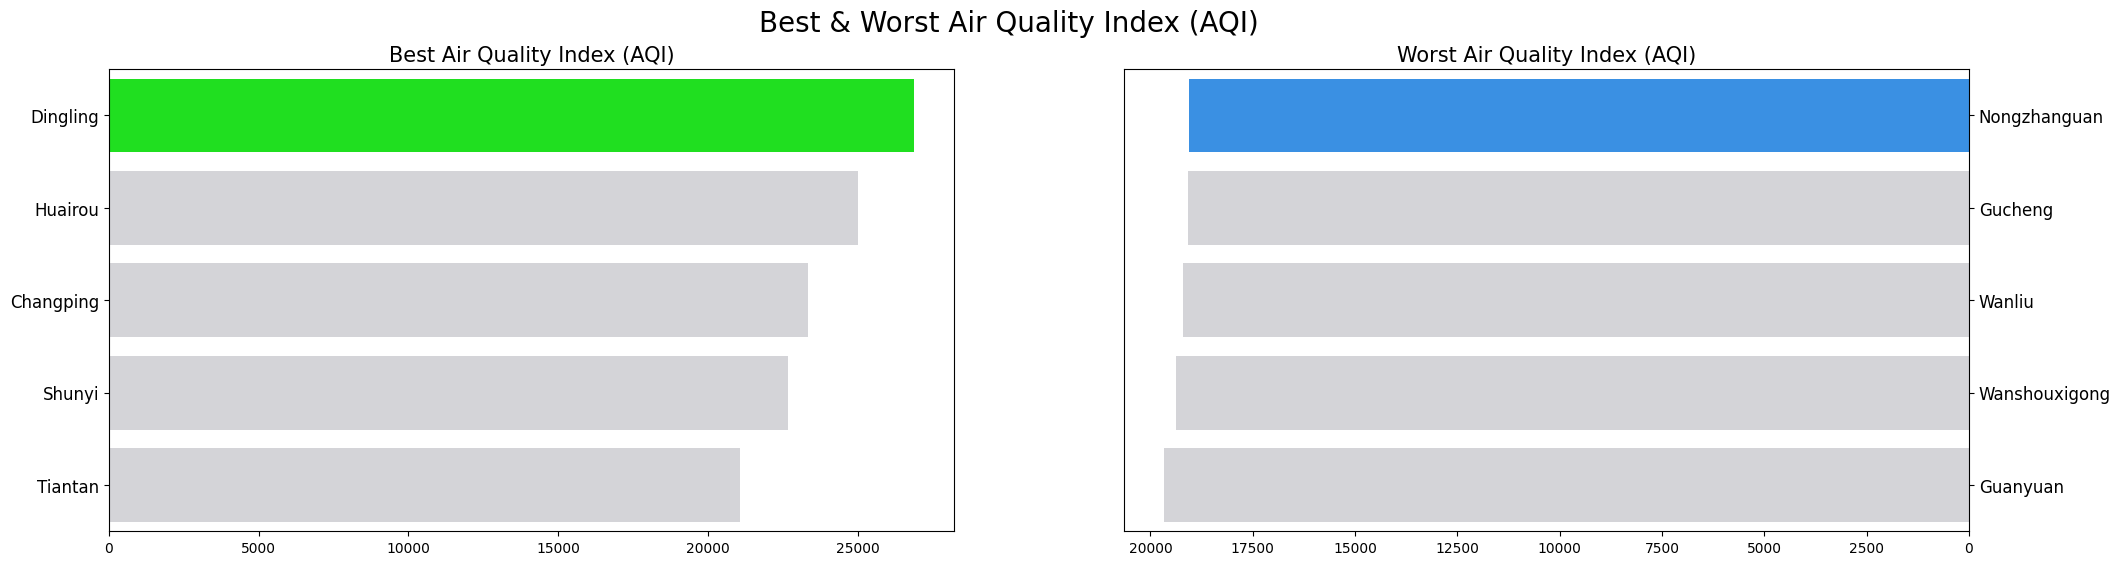

In [101]:
#membuat subplot grid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

#membuat template color untuk visualisasi
colors1 = ["#00FF00" , "#D3D3D9", "#D3D3D9", "#D3D3D9", "#D3D3D9"]
colors2 = ["#1E90FF" , "#D3D3D9", "#D3D3D9", "#D3D3D9", "#D3D3D9"]

#membuat barplot dengan inisialisasi ax[0]
sns.barplot(x="index_AQI", y="kolom_station", data=daerah_df.head(5), palette=colors1, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Air Quality Index (AQI)", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

#membuat barplot dengan inisialisasi ax[1]
sns.barplot(x="index_AQI", y="kolom_station", data=daerah_df.sort_values(by="index_AQI", ascending=True).head(5), palette=colors2, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Air Quality Index (AQI)", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best & Worst Air Quality Index (AQI)", fontsize=20) #membuat main title
plt.show()

Informasi yang di dapat dari visualisasi di atas, menunjukan bahwa daerah dengan kualitas udara terbaik di tempati oleh Dingling dan terendah di tempati oleh Nongzhanguan

### **2. Bagaimanah pengaruh TEMP, WSPM, PRES, & DEWP terhadap kualitas udara?**

In [102]:
df_AQI["kolom_PRES"] = df_AQI["kolom_PRES"].apply(lambda x: x*0.02953) #untuk mengkonversi satuan hPa menjadi satuan inHg

In [103]:
# Membuat dataframe baru berisi nilai mean berdasarkan kualitas udara
df_mean = df_AQI.groupby(by="kualitas_udara").agg({
    "kolom_TEMP": ['mean'],
    "kolom_PRES" : ['mean'],
    "kolom_DEWP" : ['mean'],
    "kolom_WSPM" : ['mean']
})
df_mean #menampilkan isi data

,kolom_TEMP,kolom_PRES,kolom_DEWP,kolom_WSPM
,mean,mean,mean,mean
kualitas_udara,,,,
Baik,14.714386,29.833908,2.141883,1.955059
Buruk,6.327116,29.955380,-1.977529,1.264944
Sedang,11.893327,29.864384,3.351435,1.368228


In [104]:
#mentranspose dataframe agar mempermudah dalam visualisasi
df_mean = df_mean.T
df_mean #Menmpilkan isi data

,kualitas_udara,Baik,Buruk,Sedang
kolom_TEMP,mean,14.714386,6.327116,11.893327
kolom_PRES,mean,29.833908,29.955380,29.864384
kolom_DEWP,mean,2.141883,-1.977529,3.351435
kolom_WSPM,mean,1.955059,1.264944,1.368228


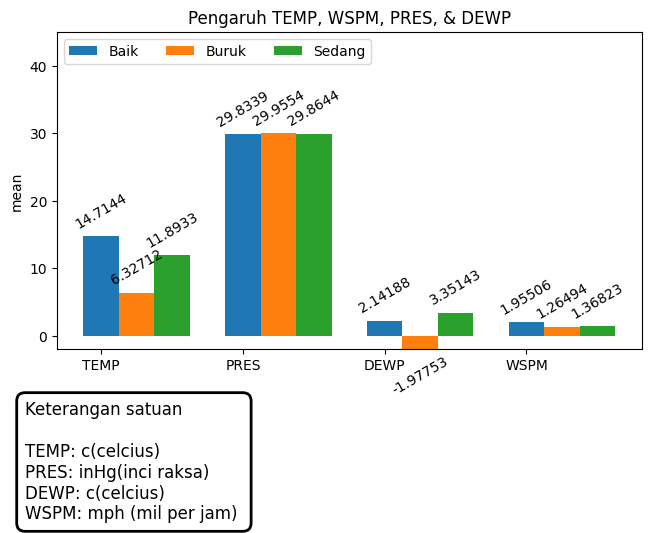

In [105]:
species = ("TEMP", "PRES", "DEWP", "WSPM") #membuat tuple untuk label attribute visualisasi

#mengatur posisi, lebar, & jarak setiap bar
x = np.arange(len(species))
width = 0.25
multiplier = 1

fig, ax = plt.subplots(layout='constrained') #membuat subplot grid

#looping untuk mengisi subplot grid dengan plots
for attribute, measurement in df_mean.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=4, rotation=30)
    multiplier += 1

# Menambah text, title,& label
ax.set_ylabel('mean')
ax.set_title('Pengaruh TEMP, WSPM, PRES, & DEWP')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(-2, 45)
bbox_props = dict(boxstyle='round, pad=0.5', edgecolor='black', facecolor='white', lw=2)
plt.text(0.03, -0.07, 'Keterangan satuan\n\nTEMP: c(celcius)\nPRES: inHg(inci raksa)\nDEWP: c(celcius)\nWSPM: mph (mil per jam) ',
         fontsize=12, color='black', bbox=bbox_props, transform=plt.gcf().transFigure)

plt.show()

Informasi yang di dapat dari visualisasi di atas. Bahwa semakin kualitas udara baik, maka TEMP juga ikut naik, PRES turun, DEWP naik, & WSPM juga naik

### **3. Bagaimana kualitas udara berdasarkan tahun, bulan, hari, & jam**

In [106]:
cat_var=["kolom_year", "kolom_month", "kolom_day", "kolom_hour"] #membuat list untuk label attribute visualisasi

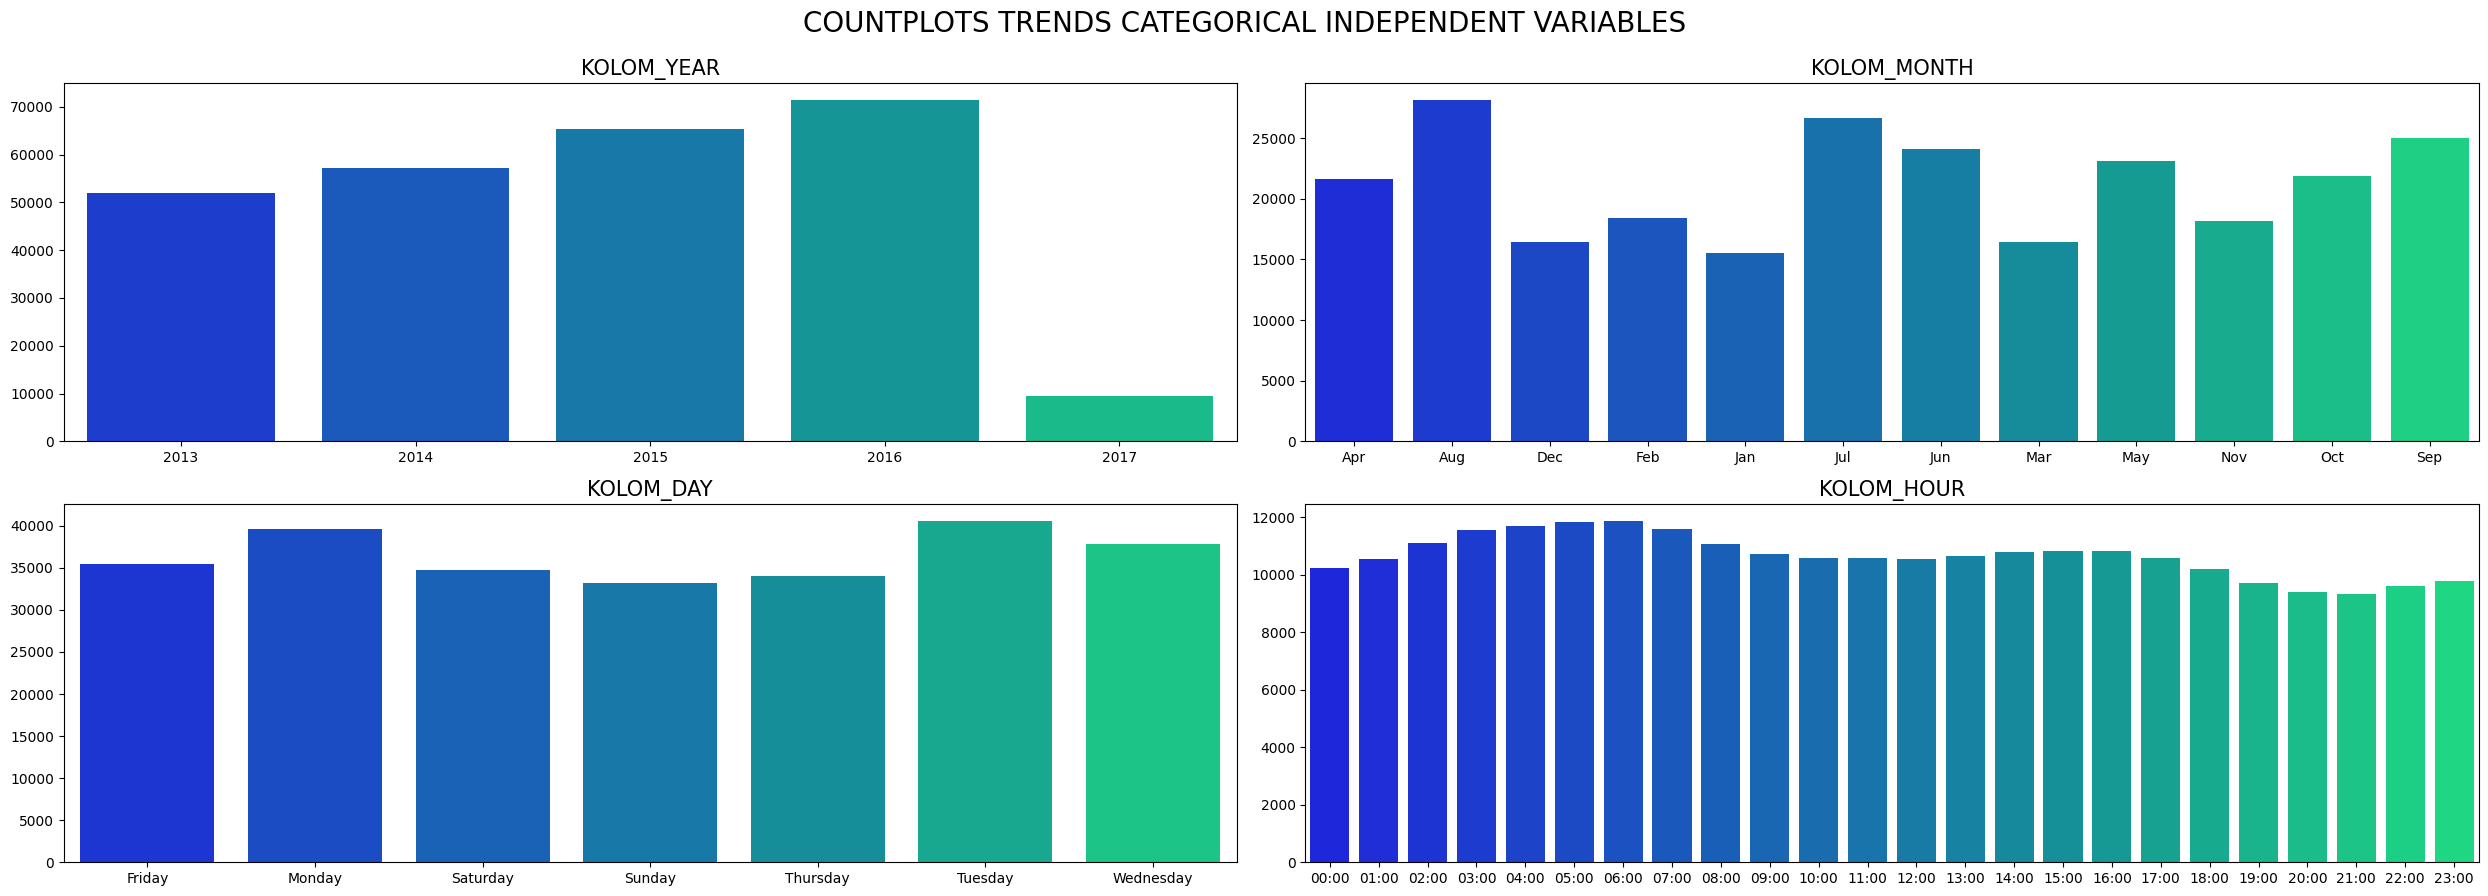

In [107]:
# Membuat subplot grid
fig, ax= plt.subplots(nrows= 2, ncols= int(len(cat_var)/2), figsize= (25,9))

# Membuat main title
plt.suptitle('Countplots trends categorical independent variables'.upper(), fontsize= 20, fontweight= 20, y= 0.99)

# Looping untuk mengisi subplot grid dengan plots
k= 0
for i in range(2):
    for j in range(int(len(cat_var)/2)):
        sns.barplot(y= df_AQI.groupby(by= cat_var[k]).index_AQI.sum(),
                    x= df_AQI.groupby(by= cat_var[k]).mean(numeric_only=True).index, ax= ax[i,j], palette= 'winter')


        ax[i,j].set_title(f'{cat_var[k].upper()}', fontsize= 15)
        ax[i,j].set_ylabel('')
        ax[i,j].set_xlabel('')
        k+=1

plt.tight_layout()
plt.show()

Informasi yang di dapat dari visualisasi di atas


*   Tahun dengan kualitas udara terbaik di tahun 2016, sedangkan terendah di tahun 2017,namun karena di tahun 2017, pengamatan hanya dilakukan 2 bulan. Maka kualitas udara terendah di tahun 2013
*   Bulan dengan kualitas udara terbaik di bulan Agustus, sedangkan terendah di bulan Januari
*    Hari dengan kualitas udara terbaik di hari Kamis, sedangkan terendah di bulan Minggu
*    waktu Jam dengan kualitas udara terbaik di jam 06:00, sedangkan terendah di jam 21:00





### **4. Heatmap untuk melihat korelasi antar variable**

In [108]:
df_heatmap = df_AQI.drop(columns=["kolom_index", "kolom_year"]) #menghapus kolom year dan index

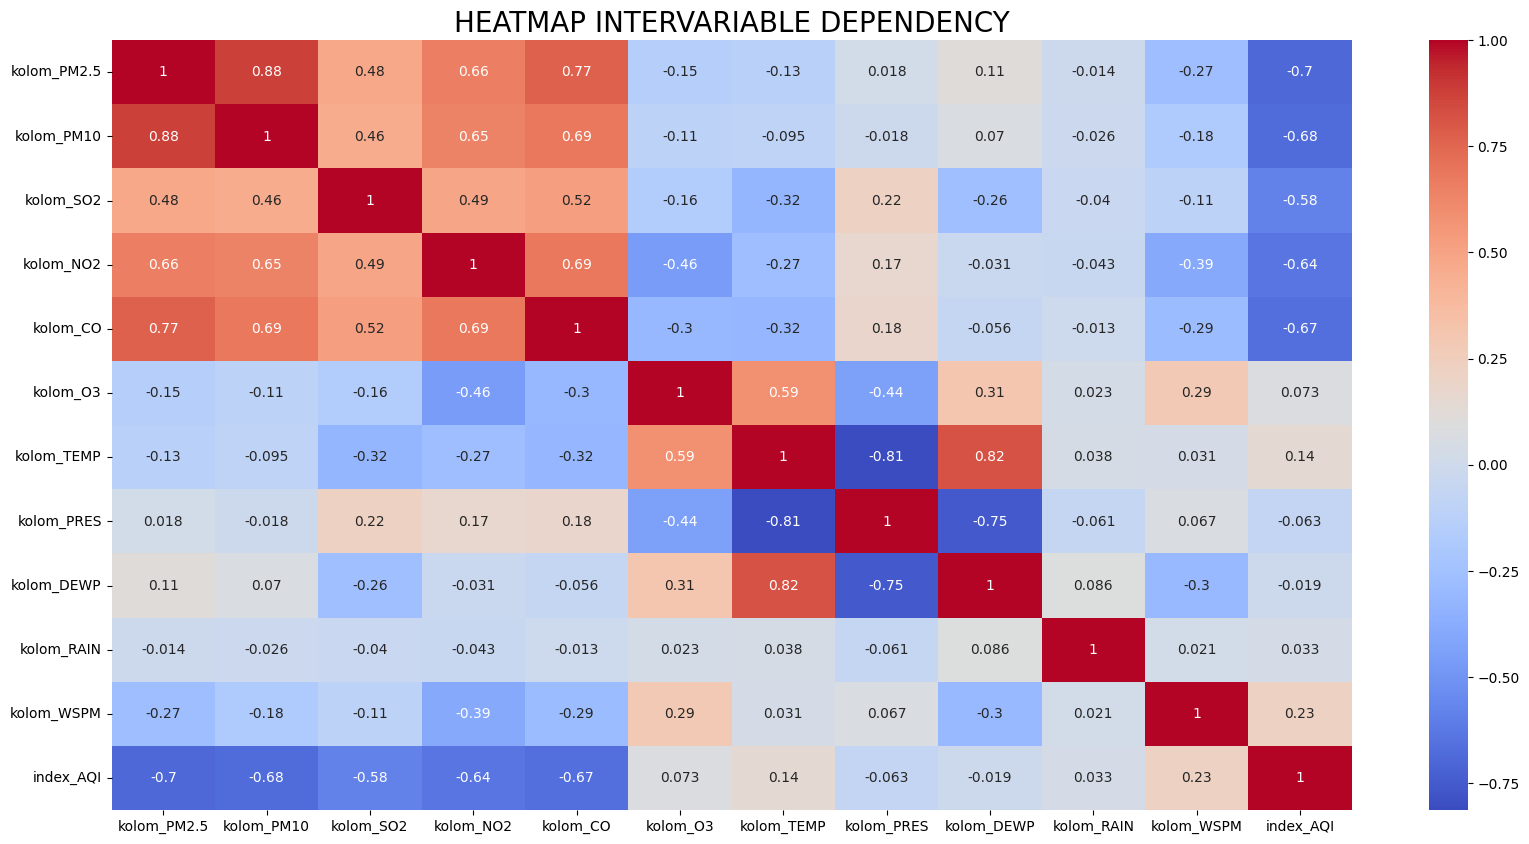

In [109]:
#menyiapkan plot size
plt.figure(figsize=(20,10))

#plotting heatmap
sns.heatmap(df_heatmap.corr(numeric_only=True), annot= True, cmap='coolwarm')

#membuat title
plt.title('Heatmap intervariable dependency'.upper(), fontsize= 20, y=1)

plt.show()

## **Conclusion**

* Conclution pertanyaan 1: Daerah dengan kualitas udara terbaik berada di Dingling, di ikuti oleh Huairou & Changping, sedangkan daerah dengan kualitas udara terendah berada di Nongzhangua, di ikuti oleh Gucheng & Wanliu

* Conclution pertanyaan 2: Semakin tinggi TEMP, WSPM, & DEWP maka semakin bagus juga kualitas udara. Namun semakin tinggi PRES maka kualitas udara akan menurun

* Conclution pertanyaa 3: Kualitas udara terbaik di tahun 2016, dan terendah di tahun 2013. Berdasarkan bulan kualitas udara terbaik di bulan Agustus, dan terendah Januari. Berdasarkan hari kualitas udara terbaik di hari kamis, dan terendah di hari Minggu. Berdasarkan waktu jam kualitas udara terbaik di jam 06:00, dan terendah di jam 21:00

In [110]:
#mengekspor dataset yang sudah di berishkan
df_AQI.to_csv("df_AQI.csv", index=False )